In [29]:
import torch, torchvision, PIL, numpy as np
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import pandas as pd
import pdb
import numpy as np
import cv2
import random
import os
from PIL import Image

In [30]:
img = PIL.Image.open('/content/sample.png') #sample input

In [79]:
def horSplit(imgPath, oneChannel = False, devi = 0): #the bigger devi is, the more tolerance allowed for the pixel to be considered as the same color
  imgg = Image.open(imgPath, 'r')
  thePix = imgg.load()
  pim = np.array(imgg)
  hh, ww, nouse = pim.shape
  ref = []

  heightPix = [] #stores the height of col (belonging to)
  h = 0
  hash = [] #we are assuming the format of music score is uniform

  row = []

  white = thePix[0,0]

  col = []

  toReturn = []

  for i in range(ww):
    row.append(thePix[i,0]) #get first row

  for i in range(hh):
    col.append(0)

  cc = 0
  th = 0

  for i in range(hh):
    th = 0
    for j in range(ww):
      if (oneChannel):
        if (thePix[j, i] != row[j]):
          col[i] = 1
          break
      else:
        for z in range(len(row[j])):
          if (abs(thePix[j, i][z] - row[j][z]) > devi):
            col[i] = 1
            th = 1
            break
        if (th == 1):
          break
  
  check = 0
  ub = 0
  lb = 0
  group = []

  for i in range(len(col)):
    if (col[i] == 1 and check == 0):
      check = 1
      ub = i
    elif (col[i] == 0 and check == 1):
      check = 0
      lb = i - 1
      #print(ub)
      #print(lb)
      #print('\n')
      group.append((ub, lb)) #looks good
  
  conti = 0
  length = 0
  maxlength = 0
  match = []

  for i in range(hh):
    match.append(0)

  for i in range(hh):
    if (col[i] == 1):
      length = 0
      condi = 0
      maxlength = 0
      for j in range(ww):
        if (thePix[j, i] != white):
          length += 1
        else:
          if (length > maxlength):
            maxlength = length
          length = 0
        
      if (maxlength > int(0.15 * ww)):
          match[i] = 1

  counter = 0
  for i in range(len(group)):
      counter = 0
      upb = group[i][0]
      lob = group[i][1]
      for j in range(upb, lob + 1):
        if (match[j] == 1):
          counter += 1

      if (counter >= 5):
        copyImg = imgg.copy()
        cropped = copyImg.crop((0, upb, ww, lob))
        toReturn.append(cropped)

    
  return toReturn

In [80]:
returned = horSplit('/content/19.png', devi = 20)

In [81]:
returned[0]

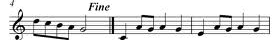

In [82]:
returned[1]

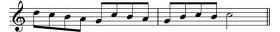

In [84]:
returned[2]

In [83]:
len(returned)

3